In [119]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as pl

In [120]:
data=pd.read_csv("svm_lab.csv")

In [121]:
#checking no of rows an cols

data.shape

(699, 11)

In [122]:

data.head(-5)


,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
689,654546,1,1,1,1,2,1,1,1,8,2
690,654546,1,1,1,3,2,1,1,1,1,2
691,695091,5,10,10,5,4,5,4,4,1,4
692,714039,3,1,1,1,2,1,1,1,1,2


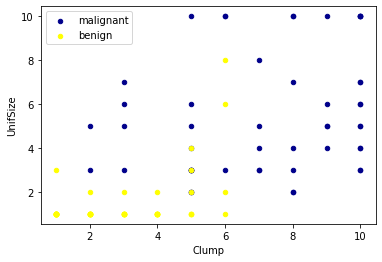

In [123]:
#distribution of calsses based on clump thickness and uniformity

ax=data[data['Class']==4][0:50].plot(kind='scatter',x='Clump',y='UnifSize',color='Darkblue',label='malignant');


ax=data[data['Class']==2][0:50].plot(kind='scatter',x='Clump',y='UnifSize',color='yellow',label='benign',ax=ax);

plt.show()

In [124]:
#DATA PREPROCESSING AND SELECTION
#Let's first look at columns data types:

data.dtypes



ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [125]:
#It looks like the BareNuc column includes some values that are not numerical. We can drop those rows:

data=data[pd.to_numeric(data['BareNuc'],errors='coerce').notnull()]

data['BareNuc']=data['BareNuc'].astype('int')

data.dtypes


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [126]:
#converting to numpy array(X'LABLES)

feature_df = data[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
x= np.asarray(feature_df)
x[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [127]:
#We want the model to predict the value of Class (I.E =Y)
# (that is, benign (=2) or malignant (=4)). As this field can have one of only two possible values, we need to change its measurement level to reflect this.

data['Class']=data['Class'].astype('int')

y=np.asarray(data['Class'])

y[0:5]


array([2, 2, 2, 2, 2])

In [128]:
#train test dataset

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=4)

print('Train_set:',x_train.shape,y_train.shape)

print('Test_set:',x_test.shape,y_test.shape)



Train_set: (546, 9) (546,)
Test_set: (137, 9) (137,)


In [129]:
#MODELLING SVM WITH SCIKITLEARN

from sklearn import svm

clf=svm.SVC(kernel='rbf')

clf.fit(x_train,y_train)


SVC()

In [130]:
#prediction

yhat=clf.predict(x_test)
yhat[0:5]

array([2, 4, 2, 4, 2])

In [131]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [132]:
# Compute  classification report

print (classification_report(y_test, yhat))




              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In [133]:
# Compute confusion matrix and classification report
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

In [134]:
#plotting confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('predicted label')
    
print(confusion_matrix(y_test, yhat, labels=[2,4]))    

[[85  5]
 [ 0 47]]


Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


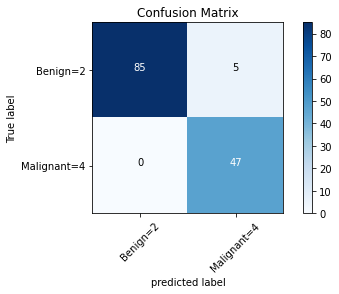

In [135]:
#plotting non normalized confusion matrix

plt.figure()

plot_confusion_matrix(cnf_matrix,classes=['Benign=2','Malignant=4'],normalize=False, title='Confusion Matrix')

In [136]:
#f1 score
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.9639038982104676

In [137]:
#jaccard score
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=2)

0.9444444444444444

 $ 1 $ 1


In [11]:
a,b,c= input().split()
a=int(a)
b=float(b)

print("%d$%.2f$%c"%(a,b,c))


1$2.10$a


10.2 2.35
